In [1]:
import jupyter_black

jupyter_black.load()

In [2]:
# import kagglehub
# import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(
    "C:/Users/auste/4 Kursas/Naturali kalba/data/data_features.csv", index_col=0
)

# Pradinė duomenų apžvalga

In [4]:
df.head()

,title,text,subject,date,label,word_count,stopword_count,punct_count,wierd_symbols_count,ent_count,processed_text
0,Senator McConnell: Saudi bill may have uninten...,WASHINGTON (Reuters) - U.S. Senate Majority Le...,politicsNews,"September 29, 2016",1,66,25,11,4,12,WASHINGTON Reuters U.S. Senate Majority Leader...
1,BREAKING: TEXAS COP STABBED 14 TIMES By Man Wh...,Who knew that in our First Black President s ...,politics,"Apr 29, 2015",0,589,284,69,1,49,knew Black President s second term killing...
2,"Obama adds Saudi, Britain stops to Germany tri...",WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,"March 16, 2016",1,98,38,18,1,25,WASHINGTON Reuters U.S. President Barack Obama...
3,Trump’s Campaign Finance Filings Reveal Milli...,There s no question that Donald Trump is runni...,News,"June 21, 2016",0,540,283,78,1,49,s question Donald Trump running ahem unique ca...
4,Finland suspects Russian aircraft violated air...,HELSINKI/MOSCOW (Reuters) - Finland s defense ...,worldnews,"December 5, 2017",1,190,77,20,1,36,HELSINKI MOSCOW Reuters Finland s defense mini...


In [5]:
df.shape

(44898, 11)

### Trūkstamos vertės duomenyse

In [6]:
df.isna().sum()

title                  0
text                   0
subject                0
date                   0
label                  0
word_count             0
stopword_count         0
punct_count            0
wierd_symbols_count    0
ent_count              0
processed_text         0
dtype: int64

### Pasiskirstymas tarp klasių

In [7]:
df.groupby("label").size()

label
0    23481
1    21417
dtype: int64

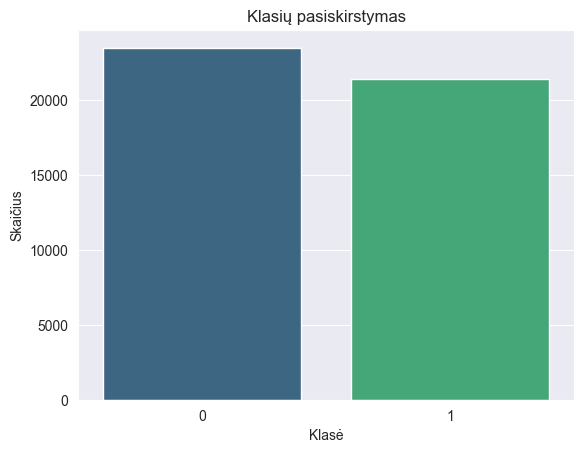

In [8]:
group_sizes = df.groupby("label").size().reset_index(name="count")

# Create a bar plot
sns.barplot(
    x="label", y="count", data=group_sizes, palette="viridis", hue="label", legend=False
)

# Add labels and title
plt.title("Klasių pasiskirstymas")
plt.xlabel("Klasė")
plt.ylabel("Skaičius")

# Show the plot
plt.show()

### Temos (angl. subject) analizė

In [9]:
df["subject"].nunique()

8

In [10]:
group_sizes_subject = (
    df.groupby(["label", "subject"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

group_sizes_subject

,label,subject,count
6,1,politicsNews,11272
7,1,worldnews,10145
2,0,News,9050
5,0,politics,6841
4,0,left-news,4459
0,0,Government News,1570
3,0,US_News,783
1,0,Middle-east,778


### Kuo skiriasi politicsNews nuo tsg New ir tsg politics?


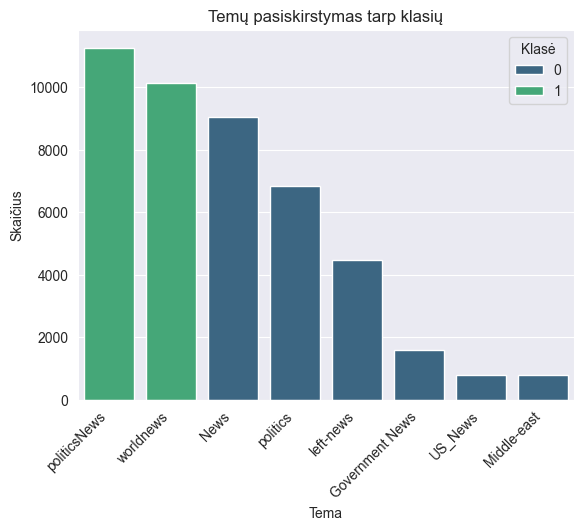

In [11]:
# Create a bar plot
sns.barplot(
    x="subject", y="count", data=group_sizes_subject, palette="viridis", hue="label"
)

# Add labels and title
plt.title("Temų pasiskirstymas tarp klasių")
plt.xlabel("Tema")
plt.ylabel("Skaičius")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Klasė")

# Show the plot
plt.show();

0 - Fake News, 1 - True.

Matome, kad temos tarp klasiu nepersidengia, todel pagal tai klasifikuoti duomenu negalesime.

### Požymių pasiskistymas tarp klasių

In [12]:
df.describe()

,label,word_count,stopword_count,punct_count,wierd_symbols_count,ent_count
count,44898.000000,44898.000000,44898.000000,44898.000000,44898.000000,44898.000000
mean,0.477015,405.282284,187.964965,49.581607,1.730055,45.097621
std,0.499477,351.265595,166.374220,44.992897,1.363114,38.868701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,203.000000,89.000000,23.000000,1.000000,21.000000
50%,0.000000,362.000000,167.000000,42.000000,1.000000,38.000000
75%,1.000000,513.000000,242.000000,63.000000,1.000000,58.000000
max,1.000000,8135.000000,3561.000000,1107.000000,9.000000,804.000000


df.head(2)

#### word_count

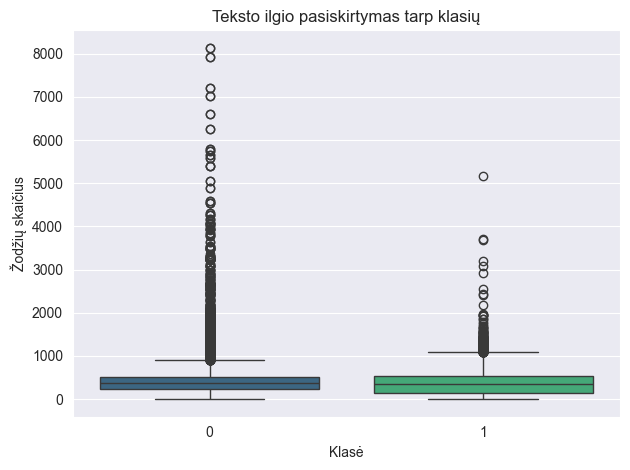

In [13]:
# Assuming df is your DataFrame
sns.boxplot(
    x="label", y="word_count", data=df, palette="viridis", hue="label", legend=False
)

# Customize the plot
plt.title("Teksto ilgio pasiskirtymas tarp klasių")
plt.xlabel("Klasė")
plt.ylabel("Žodžių skaičius")

# Show the plot
plt.tight_layout()
plt.show()

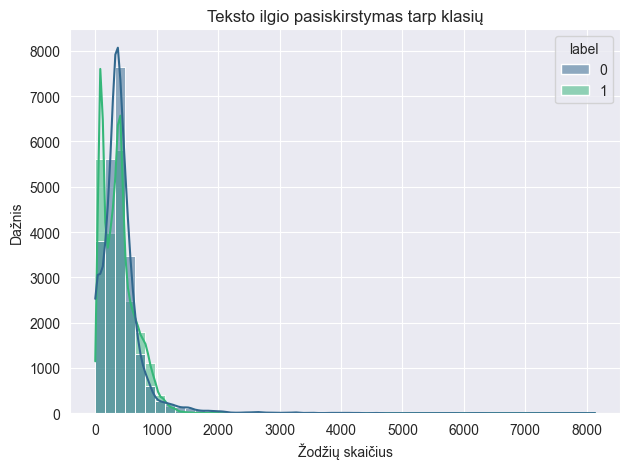

In [14]:
sns.histplot(data=df, x="word_count", hue="label", kde=True, palette="viridis", bins=50)

# Customize the plot
plt.title("Teksto ilgio pasiskirstymas tarp klasių")
plt.xlabel("Žodžių skaičius")
plt.ylabel("Dažnis")

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
df.groupby("label")["word_count"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,23481.0,423.197905,408.388890,0.0,240.0,363.0,506.0,8135.0
1,21417.0,385.640099,274.006204,0.0,148.0,359.0,525.0,5172.0


Pastebėjimai:

1. Vidutiniskai fake tekstai yra ilgesni, taip pat matoma, kad sioje klaseje yra gerokai daugiau ilgo teksto isskirciu.
2. Duomenis be teksto reiketu pasalinti is duomenu rinkinio, t.y. kur word_count = 0.
3. Apskritai teksto ilgis tarp klasių yra panašus -> ar tai bus naudingas feature apmokant modelius?

In [16]:
# tusti tekstai -> pasalinti is analizes
df.loc[df["word_count"] == 0, ["title", "text"]]

,title,text
118,OBNOXIOUS! ANDREA MITCHELL Physically Removed ...,
136,SHOCKER! IS MITT ROMNEY Being Considered For A...,
246,WHOA! RUSH LIMBAUGH RIPS Into Republicans Who ...,
255,RADICAL ERIC HOLDER STIRS THE POT…Claims Repub...,
280,ONE MILLION DEMOCRATS Switched To TRUMP And He...,
...,...,...
44568,Valerie Jarrett Gives Most Hateful Exit Interv...,
44763,BOLD! HOLLYWOOD ACTOR Speaks Up For Trump…Tell...,
44823,EPIC! CNN ANCHOR DON LEMON Cuts Interview Afte...,
44893,MIKE ROWE ASKS: Why Are OUR Tax Dollars Fundin...,


In [17]:
df = df.loc[df["word_count"] != 0].copy()  # pasalinu be irasus be teksto

In [18]:
df

,title,text,subject,date,label,word_count,stopword_count,punct_count,wierd_symbols_count,ent_count,processed_text
0,Senator McConnell: Saudi bill may have uninten...,WASHINGTON (Reuters) - U.S. Senate Majority Le...,politicsNews,"September 29, 2016",1,66,25,11,4,12,WASHINGTON Reuters U.S. Senate Majority Leader...
1,BREAKING: TEXAS COP STABBED 14 TIMES By Man Wh...,Who knew that in our First Black President s ...,politics,"Apr 29, 2015",0,589,284,69,1,49,knew Black President s second term killing...
2,"Obama adds Saudi, Britain stops to Germany tri...",WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,"March 16, 2016",1,98,38,18,1,25,WASHINGTON Reuters U.S. President Barack Obama...
3,Trump’s Campaign Finance Filings Reveal Milli...,There s no question that Donald Trump is runni...,News,"June 21, 2016",0,540,283,78,1,49,s question Donald Trump running ahem unique ca...
4,Finland suspects Russian aircraft violated air...,HELSINKI/MOSCOW (Reuters) - Finland s defense ...,worldnews,"December 5, 2017",1,190,77,20,1,36,HELSINKI MOSCOW Reuters Finland s defense mini...
...,...,...,...,...,...,...,...,...,...,...,...
44891,LOOK WHO “THE VIEW” HIRED To Replace Only “Con...,"Jedediah Bila is at most, a lukewarm conservat...",left-news,"Sep 18, 2017",0,519,266,51,1,50,Jedediah Bila lukewarm conservative s hardcore...
44892,German SPD leader says EU must stop accession ...,BERLIN (Reuters) - Germany s Social Democrat (...,worldnews,"September 3, 2017",1,178,76,20,1,26,BERLIN Reuters Germany s Social Democrat SPD l...
44894,U.S. lawmakers target Myanmar military with ne...,WASHINGTON (Reuters) - U.S. lawmakers proposed...,politicsNews,"November 2, 2017",1,401,179,39,4,58,WASHINGTON Reuters U.S. lawmakers proposed tar...
44895,DRAIN THE SWAMP! Republicans NOT Running for R...,One thing President Trump has been able to do ...,politics,"Oct 25, 2017",0,483,209,76,1,68,thing President Trump able office expose polit...


#### stopword_count

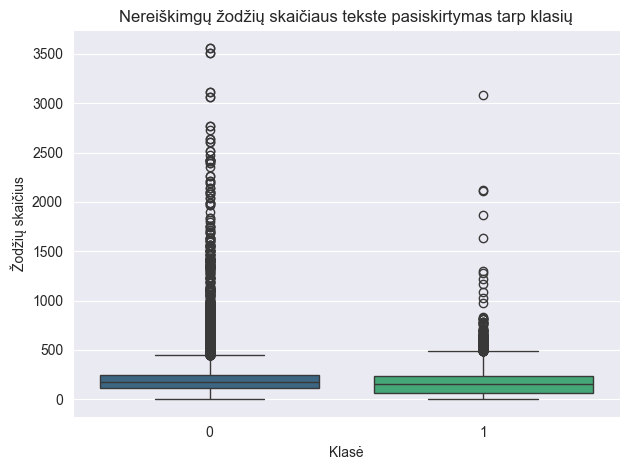

In [19]:
# Assuming df is your DataFrame
sns.boxplot(
    x="label", y="stopword_count", data=df, palette="viridis", hue="label", legend=False
)

# Customize the plot
plt.title("Nereiškimgų žodžių skaičiaus tekste pasiskirtymas tarp klasių")
plt.xlabel("Klasė")
plt.ylabel("Žodžių skaičius")

# Show the plot
plt.tight_layout()
plt.show()

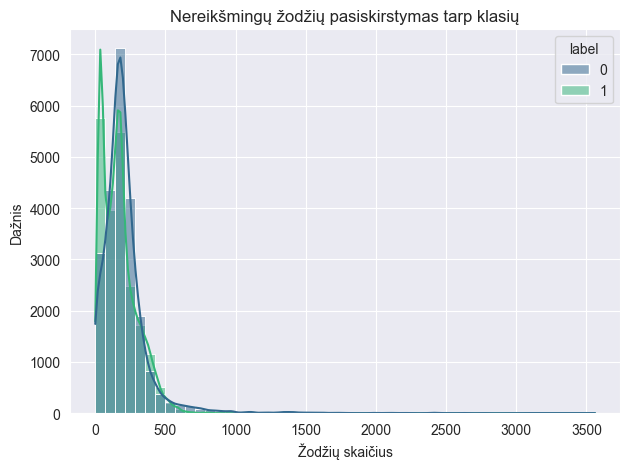

In [20]:
sns.histplot(
    data=df, x="stopword_count", hue="label", kde=True, palette="viridis", bins=50
)

# Customize the plot
plt.title("Nereikšmingų žodžių pasiskirstymas tarp klasių")
plt.xlabel("Žodžių skaičius")
plt.ylabel("Dažnis")

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
df.groupby("label")["stopword_count"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22851.0,209.057459,193.133658,0.0,118.0,179.0,249.0,3561.0
1,21416.0,170.997338,128.174645,5.0,64.0,155.0,234.0,3086.0


Pastebėjimai:

1. Pasiskisrtymas tarp klasiu panasus, velgi daugiau isskirciu Fake News klaseje -> galima susieti su teksto ilgiu -> tiesiog count nera reprezentatyvi metrika -> siulymas pereiti prie santykio.

#### stopwords_ratio

In [22]:
df["stopwords_ratio"] = df["stopword_count"] / df["word_count"]

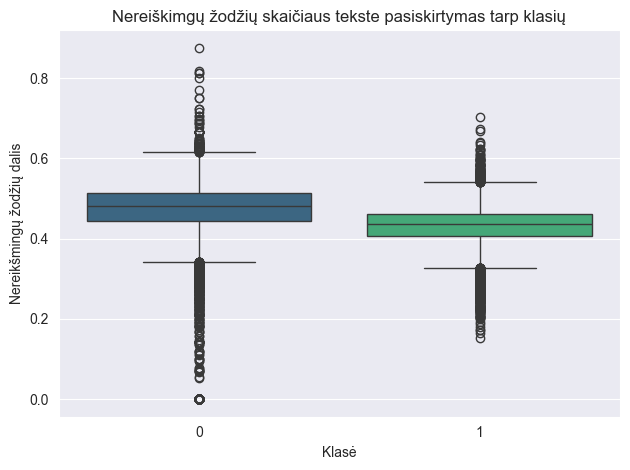

In [23]:
# Assuming df is your DataFrame
sns.boxplot(
    x="label",
    y="stopwords_ratio",
    data=df,
    palette="viridis",
    hue="label",
    legend=False,
)

# Customize the plot
plt.title("Nereiškimgų žodžių skaičiaus tekste pasiskirtymas tarp klasių")
plt.xlabel("Klasė")
plt.ylabel("Nereikšmingų žodžių dalis")

# Show the plot
plt.tight_layout()
plt.show()

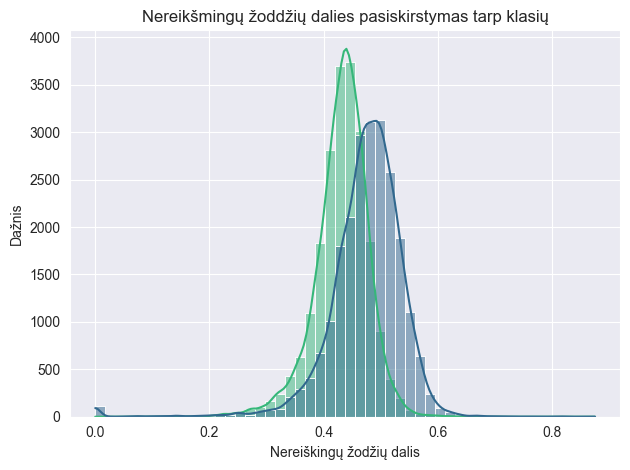

In [24]:
sns.histplot(
    data=df,
    x="stopwords_ratio",
    hue="label",
    kde=True,
    palette="viridis",
    bins=50,
    legend=False,
)

# Customize the plot
plt.title("Nereikšmingų žoddžių dalies pasiskirstymas tarp klasių")
plt.xlabel("Nereiškingų žodžių dalis")
plt.ylabel("Dažnis")
# plt.legend(title="Klasė")

# Show the plot
plt.tight_layout()
plt.show()

In [25]:
df.groupby("label")["stopwords_ratio"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22851.0,0.474067,0.067302,0.000000,0.444772,0.480392,0.513402,0.875000
1,21416.0,0.431580,0.047102,0.151515,0.407583,0.435644,0.460940,0.702315


In [26]:
# nezinau, ar sita dalis reikalinga, just for fun
from scipy import stats

class_0_data = df[df["label"] == 0]["stopwords_ratio"]
class_1_data = df[df["label"] == 1]["stopwords_ratio"]

# H0: vidurkiai lygus
# HA: vidurkiai nelygus


# Perform an independent T-test to compare means of the two classes
t_stat, p_value = stats.ttest_ind(class_0_data, class_1_data)

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 76.48102819714515
P-value: 0.0


Pastebėjimai:

1. Nagrinejant nereiksmingu zodziu santyki matomas skirtumas tarp klasiu.
2. Pastebima, kad FakeNews turi didesne dali stopwords.

#### wierd_symbols

In [27]:
df.loc[df["wierd_symbols_count"] != 0].shape

(44176, 12)

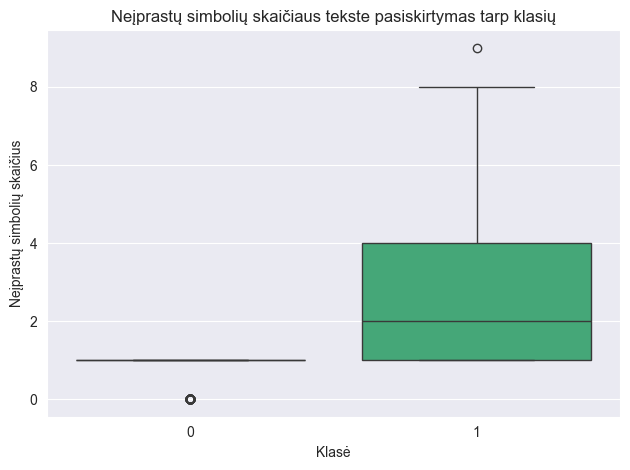

In [28]:
# Assuming df is your DataFrame
sns.boxplot(
    x="label",
    y="wierd_symbols_count",
    data=df,
    palette="viridis",
    hue="label",
    legend=False,
)

# Customize the plot
plt.title("Neįprastų simbolių skaičiaus tekste pasiskirtymas tarp klasių")
plt.xlabel("Klasė")
plt.ylabel("Neįprastų simbolių skaičius")

# Show the plot
plt.tight_layout()
plt.show()

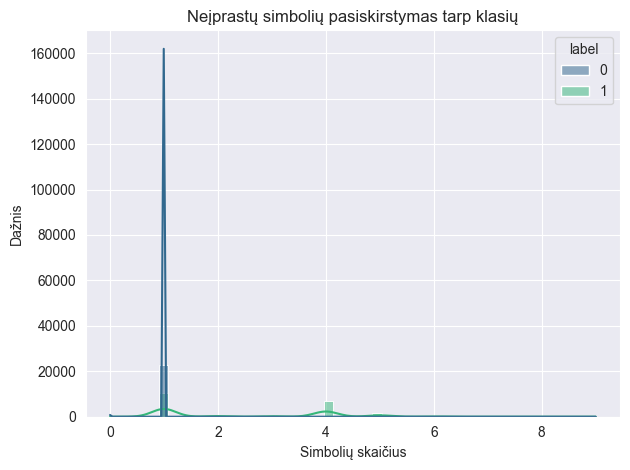

In [29]:
sns.histplot(
    data=df,
    x="wierd_symbols_count",
    hue="label",
    kde=True,
    palette="viridis",
    bins=50,
)

# Customize the plot
plt.title("Neįprastų simbolių pasiskirstymas tarp klasių")
plt.xlabel("Simbolių skaičius")
plt.ylabel("Dažnis")
# plt.legend(title="Klasė")

# Show the plot
plt.tight_layout()
plt.show()

In [30]:
df.groupby("label")["wierd_symbols_count"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22851.0,0.996018,0.062981,0.0,1.0,1.0,1.0,1.0
1,21416.0,2.534787,1.628805,1.0,1.0,2.0,4.0,9.0


Pastebejimai:

1. Dazniau pasitaiko tarp True News klases.
2. Reiketu panagrineti, kas konkreciai cia per simboliai.
3. 

#### punct_ratio

In [31]:
df["punct_ratio"] = df["punct_count"] / df["word_count"]

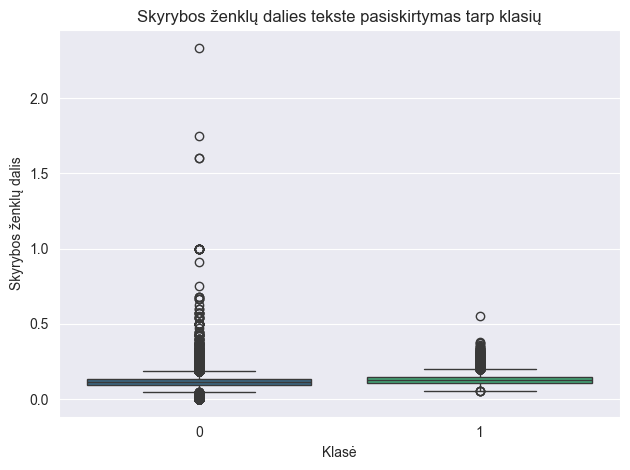

In [32]:
# Assuming df is your DataFrame
sns.boxplot(
    x="label",
    y="punct_ratio",
    data=df,
    palette="viridis",
    hue="label",
    legend=False,
)

# Customize the plot
plt.title("Skyrybos ženklų dalies tekste pasiskirtymas tarp klasių")
plt.xlabel("Klasė")
plt.ylabel("Skyrybos ženklų dalis")

# Show the plot
plt.tight_layout()
plt.show()

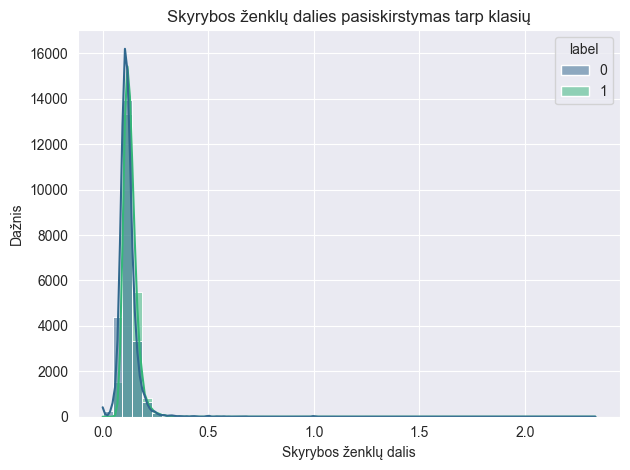

In [33]:
sns.histplot(
    data=df,
    x="punct_ratio",
    hue="label",
    kde=True,
    palette="viridis",
    bins=50,
)

# Customize the plot
plt.title("Skyrybos ženklų dalies pasiskirstymas tarp klasių")
plt.xlabel("Skyrybos ženklų dalis")
plt.ylabel("Dažnis")
# plt.legend(title="Klasė")

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
df.groupby("label")["punct_ratio"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22851.0,0.119072,0.051017,0.000000,0.097071,0.113043,0.132115,2.333333
1,21416.0,0.130227,0.031429,0.052516,0.109205,0.125190,0.145352,0.551095


Pastebejimai:

1. Didesne dalis skyrybos zenklu fake news klaseje. Yra atveju, kai daugiau nei zodziu skyrybos zenklu.
   Matoma, kad tokie irasai yra visai nenaudingi - susideda is vieno zodzio ir pan. Reikia apsvarstyti, koks minimalus zodziu skaicius yra jau skaitomas naudingu tekstu.

In [35]:
df.loc[df["punct_ratio"] >= 1]["text"]

1081                                                Enjoy:
4130                                                Watch:
5188                                               Watch: 
6172        ***SHARE This HILL-arious video everywhere!***
9089                                                Enjoy:
9878                                                Watch:
19843               ***WARNING***This video is GRAPHIC!***
26231                                                Ouch!
33843                                               Enjoy:
35202    (function(){ var s=document.createElement('scr...
36021                                               Watch:
36265                                                Ouch!
40265                                               Enjoy:
40365                                              Watch: 
41917       ***SHARE This HILL-arious video everywhere!***
Name: text, dtype: object

In [36]:
# tekstas irasu trumpesniu nei 10 zodziu, BET gal ideja yra link'u skaiciu imt kaip feature (gali buti count, gali buti boolean)
df.loc[df["word_count"] < 10]["text"]

275                Wow! These people are clueless! Scary! 
586               Boom!Courtesy of: comicallyincorrect.com
1081                                                Enjoy:
1265                     LIVE FEED of Turkey s coup here: 
1364                     Below the belt h/t Weasel Zippers
                               ...                        
43927          https://www.youtube.com/watch?v=Ws5ojb0PCCo
43955                    My brothers DIED for that flag!  
43998            The deception was really a  Glitch Sure! 
44478    This is great! Protesters let it rip on Hillary! 
44758                            Watch the speeches live; 
Name: text, Length: 236, dtype: object

#### lexical_richness

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Ensure necessary resources are downloaded
# nltk.download("punkt")
# nltk.download("stopwords")
# nltk.download("wordnet")
# nltk.download("omw-1.4")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


def lexical_richness(text, min_word_count=10):

    # Tokenize the text into words
    tokens = word_tokenize(text.lower())  # Lowercase for uniformity

    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Calculate unique words and total words
    unique_words = set(tokens)
    total_words = len(tokens)

    # Return lexical richness only if total words meet the threshold
    if total_words >= min_word_count:
        return len(unique_words) / total_words
    else:
        return 0

In [38]:
df["lexical_richness"] = df["text"].apply(lexical_richness)

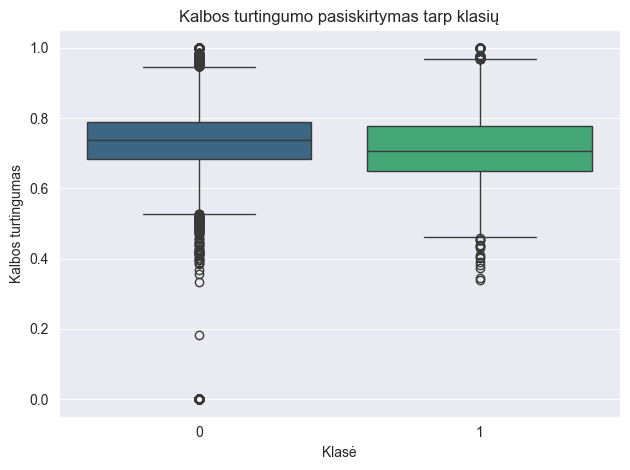

In [39]:
# Assuming df is your DataFrame
sns.boxplot(
    x="label",
    y="lexical_richness",
    data=df,
    palette="viridis",
    hue="label",
    legend=False,
)

# Customize the plot
plt.title("Kalbos turtingumo pasiskirtymas tarp klasių")
plt.xlabel("Klasė")
plt.ylabel("Kalbos turtingumas")

# Show the plot
plt.tight_layout()
plt.show()

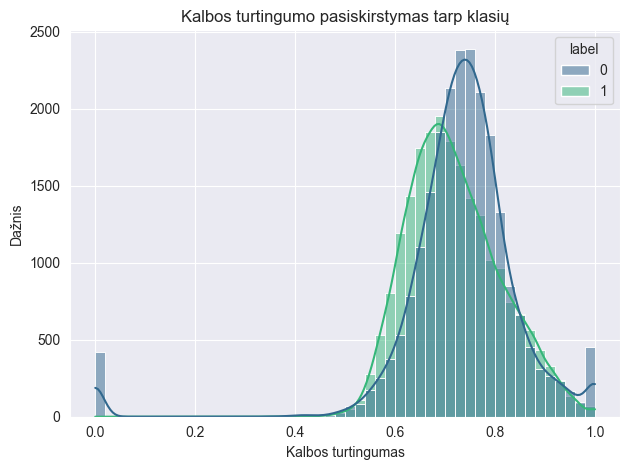

In [40]:
sns.histplot(
    data=df,
    x="lexical_richness",
    hue="label",
    kde=True,
    palette="viridis",
    bins=50,
)

# Customize the plot
plt.title("Kalbos turtingumo pasiskirstymas tarp klasių")
plt.xlabel("Kalbos turtingumas")
plt.ylabel("Dažnis")
# plt.legend(title="Klasė")

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
df.groupby("label")["lexical_richness"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22851.0,0.729056,0.133368,0.000000,0.684492,0.737752,0.789474,1.0
1,21416.0,0.718381,0.093413,0.340126,0.650624,0.707547,0.777778,1.0


In [42]:
class_0_data = df[df["label"] == 0]["lexical_richness"]
class_1_data = df[df["label"] == 1]["lexical_richness"]

# H0: vidurkiai lygus
# HA: vidurkiai nelygus


# Perform an independent T-test to compare means of the two classes
t_stat, p_value = stats.ttest_ind(class_0_data, class_1_data)

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 9.694520329161708
P-value: 3.347313962467759e-22


Pastebejimai:

1. Fake news klase turi didesni turtinguma.
2. Atrodo visai cool feature, bet reikia patikrint ar nekorealiuos su kitais panasiais! pries naudojant modeliui

In [43]:
df.loc[df["lexical_richness"] < 0.1]["text"]

64       OOPS! IN 2008 BILL CLINTON SAID THE SAME THING...
275                Wow! These people are clueless! Scary! 
427      This guy is awesome! He is so right and so on ...
484      Obviously not the smartest cowards in the dese...
586               Boom!Courtesy of: comicallyincorrect.com
                               ...                        
43998            The deception was really a  Glitch Sure! 
44478    This is great! Protesters let it rip on Hillary! 
44684    IN 1995, HILLARY CLINTON ASSUMED HER COMEDY WA...
44729    Who wrote this garble for granny Clinton? She ...
44758                            Watch the speeches live; 
Name: text, Length: 421, dtype: object

In [44]:
df.loc[(df["label"] == 0) & (df["lexical_richness"] > 0.9)]

,title,text,subject,date,label,word_count,stopword_count,punct_count,wierd_symbols_count,ent_count,processed_text,stopwords_ratio,punct_ratio,lexical_richness
22,GOODBYE HILLARY? Here Comes Dumb And Dumber,Can you believe it? The clown that can t keep ...,politics,"Oct 6, 2015",0,98,48,10,1,11,believe clown t hands women faux Indian social...,0.489796,0.102041,0.962963
30,FLASHBACK: UNCOVERED VIDEO SHOWS HYPOCRITE HAR...,In 1993 Harry Reid wrote the Immigration Stabi...,politics,"Aug 23, 2015",0,78,36,4,1,10,1993 Harry Reid wrote Immigration Stabilizatio...,0.461538,0.051282,0.933333
157,WHAT THE U.S. Would Save If Trump Cut Aid To U...,The U.N. voted against America moving our emba...,politics,"Dec 29, 2017",0,262,62,14,1,113,U.N. voted America moving embassy Jerusalem ra...,0.236641,0.053435,0.922705
192,TRUMP NAILS IT AGAIN: “Americans are sick of b...,Donald Trump was in Nashville this past weeken...,politics,"Aug 31, 2015",0,24,12,1,1,3,Donald Trump Nashville past weekend spoke sile...,0.500000,0.041667,1.000000
195,CAUGHT ON CAMERA! ANTI-TRUMP THUGS Stoop To Ne...,The anti-Trump protesters stoop to a new low a...,politics,"May 29, 2016",0,37,16,4,1,1,anti Trump protesters stoop new low challenged...,0.432432,0.108108,0.952381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44675,#DNC GIVES ANTI-HILLARY Dems Free Speech Cage ...,"It s just cleaner that way You know, keeping a...",left-news,"Jul 27, 2016",0,28,12,1,1,4,s cleaner way know keeping disagrees Hillary c...,0.428571,0.035714,0.933333
44764,DO YOU WANT TO SAVE AMERICA FROM HILLARY? Shar...,WATCH: Even her friends on the Left appear to ...,politics,"Mar 10, 2016",0,29,14,3,1,2,WATCH friends Left appear fed Hillary s lies p...,0.482759,0.103448,0.933333
44778,YOU WON’T BELIEVE THIS: WATCH DONNA BRAZILE De...,"Well, first of all, I didn t have my hands in...",left-news,"Mar 17, 2017",0,47,28,7,1,1,didn t hands cookie jar m operative m strate...,0.595745,0.148936,1.000000
44785,WOW! CHICAGO PROTESTER Caught On Camera Admits...,Here s proof that the violence we saw taking p...,left-news,"Mar 15, 2016",0,74,21,10,1,5,s proof violence saw taking place Chicago orga...,0.283784,0.135135,0.910714


#### sentiment & subjectivity

In [45]:
import spacy
import pandas as pd
from spacytextblob.spacytextblob import SpacyTextBlob

# Load spaCy model and add spacytextblob pipeline
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")


def get_sentiment_subjectivity(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Get sentiment polarity and subjectivity
    sentiment = doc._.blob.polarity  # Sentiment polarity (-1 to 1)
    subjectivity = doc._.blob.subjectivity  # Subjectivity (0 to 1)

    return sentiment, subjectivity

In [46]:
df[["sentiment", "subjectivity"]] = df["text"].apply(
    lambda x: pd.Series(get_sentiment_subjectivity(x))
)

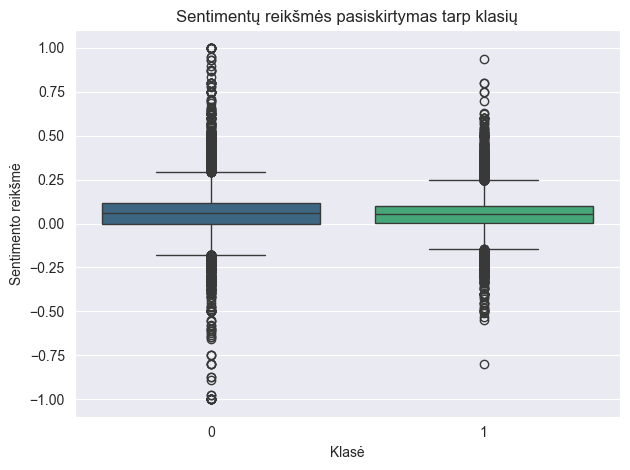

In [47]:
# Assuming df is your DataFrame
sns.boxplot(
    x="label",
    y="sentiment",
    data=df,
    palette="viridis",
    hue="label",
    legend=False,
)

# Customize the plot
plt.title("Sentimentų reikšmės pasiskirtymas tarp klasių")
plt.xlabel("Klasė")
plt.ylabel("Sentimento reikšmė")

# Show the plot
plt.tight_layout()
plt.show()

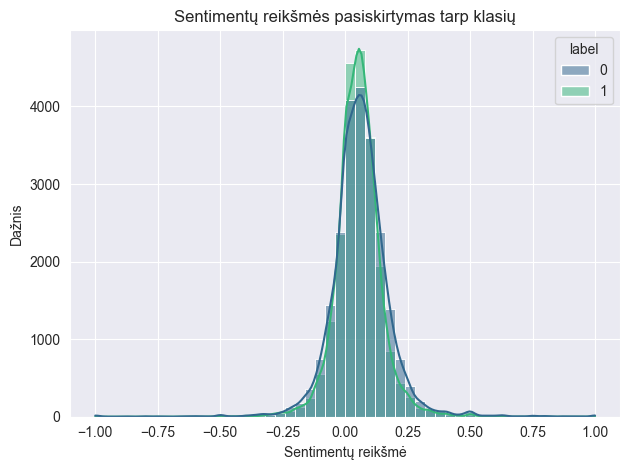

In [48]:
sns.histplot(
    data=df,
    x="sentiment",
    hue="label",
    kde=True,
    palette="viridis",
    bins=50,
)

# Customize the plot
plt.title("Sentimentų reikšmės pasiskirtymas tarp klasių")
plt.xlabel("Sentimentų reikšmė")
plt.ylabel("Dažnis")
# plt.legend(title="Klasė")

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
df.groupby("label")["sentiment"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22851.0,0.061113,0.119482,-1.0,0.000000,0.058333,0.117774,1.0000
1,21416.0,0.053535,0.091853,-0.8,0.001389,0.052197,0.100119,0.9375


Pastebejimai:

1. fake news sentimentu reiksmes pasiskirste daug placiau -> polinkis i krastutinumus?
2. Apskritai vidurkiai panasus.
3. Galbut sentimentu analize/skaiciavima reiketu daryti su tekstu, is kurio jau pasalinti stopwords?

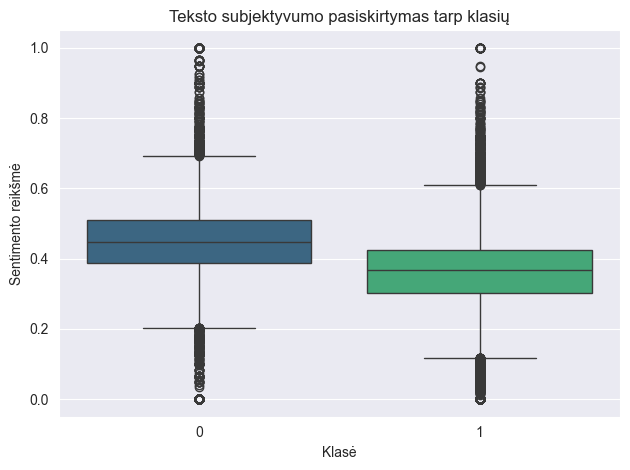

In [50]:
# Assuming df is your DataFrame
sns.boxplot(
    x="label",
    y="subjectivity",
    data=df,
    palette="viridis",
    hue="label",
    legend=False,
)

# Customize the plot
plt.title("Teksto subjektyvumo pasiskirtymas tarp klasių")
plt.xlabel("Klasė")
plt.ylabel("Sentimento reikšmė")

# Show the plot
plt.tight_layout()
plt.show()

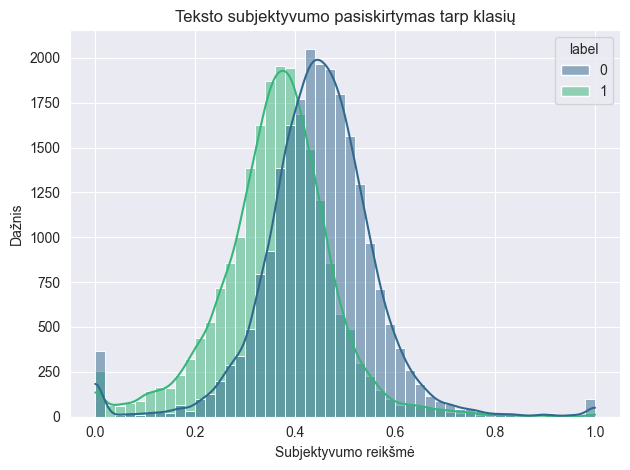

In [51]:
sns.histplot(
    data=df,
    x="subjectivity",
    hue="label",
    kde=True,
    palette="viridis",
    bins=50,
)

# Customize the plot
plt.title("Teksto subjektyvumo pasiskirtymas tarp klasių")
plt.xlabel("Subjektyvumo reikšmė")
plt.ylabel("Dažnis")
# plt.legend(title="Klasė")

# Show the plot
plt.tight_layout()
plt.show()

In [52]:
df.groupby("label")["subjectivity"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22851.0,0.445630,0.119573,0.0,0.386730,0.447787,0.509289,1.0
1,21416.0,0.361724,0.115629,0.0,0.302718,0.367506,0.426021,1.0


Pastebejimai:

1. Fake news turi vidutiniskai aukstesni subjectivity ivertiima, tai reikia kad tekstas yra maziau objektyvus (makes sense).
2. Sita tai pat gal reiketu deti ant teksto, kuris jau be stopwords?
3. Tiek subjectivity tiek sentimentus reikia padaryti ir Title stulpeliui.

## Hashtags, Mentions & URLs

In [53]:
import re


def extract_hashtags(text):
    return re.findall(r"#\w+", text)


def extract_mentions(text):
    return re.findall(r"@\w+", text)


def extract_urls(text):
    return re.findall(r"http[s]?://\S+|www\.\S+", text)

In [54]:
# Istraukti links, hastags ir mentions
df["hashtags"] = df["text"].apply(extract_hashtags)
df["mentions"] = df["text"].apply(extract_mentions)
df["urls"] = df["text"].apply(extract_urls)

In [55]:
# Links, hastags ir mentions skaicius tekste

df["hashtag_count"] = df["hashtags"].apply(len)
df["mention_count"] = df["mentions"].apply(len)
df["url_count"] = df["urls"].apply(len)

In [70]:
df["has_hashtags"] = (df["hashtag_count"] > 0).astype(int)
df["has_mentions"] = (df["mention_count"] > 0).astype(int)
df["has_urls"] = (df["url_count"] > 0).astype(int)

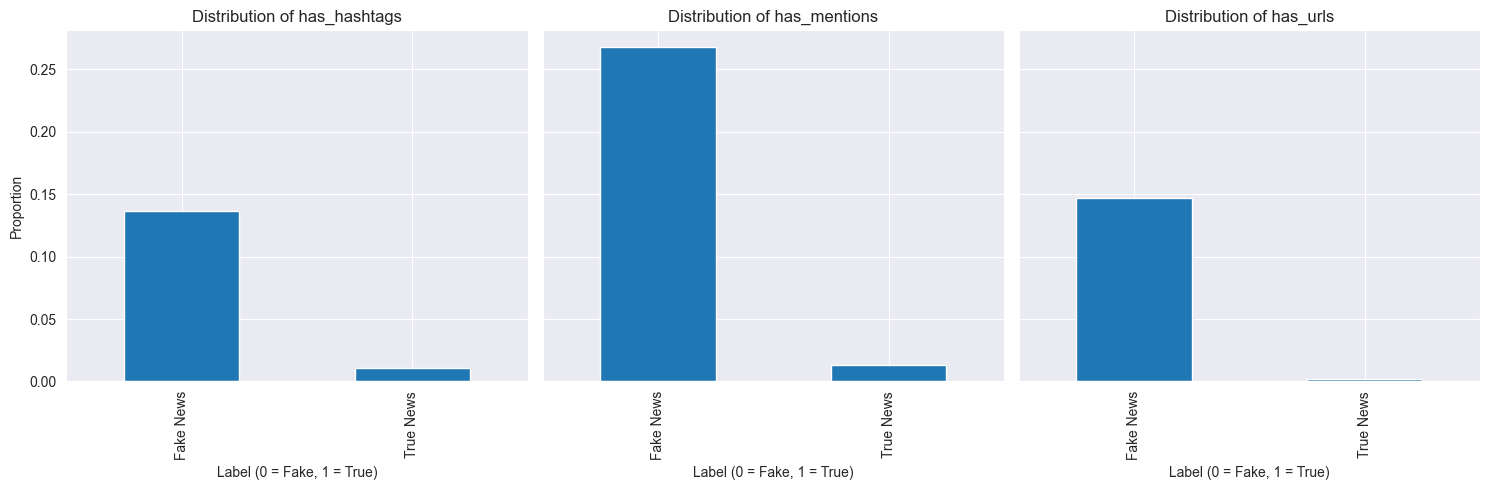

In [72]:
import matplotlib.pyplot as plt

# Features to plot
features = ["has_hashtags", "has_mentions", "has_urls"]

# Create subplots
fig, axes = plt.subplots(1, len(features), figsize=(15, 5), sharey=True)

# Plot each feature
for i, feature in enumerate(features):
    df.groupby("label")[feature].mean().plot(
        kind="bar", ax=axes[i], title=f"Distribution of {feature}"
    )
    axes[i].set_xlabel("Label (0 = Fake, 1 = True)")
    axes[i].set_ylabel("Proportion" if i == 0 else "")
    axes[i].set_xticks([0, 1], labels=["Fake News", "True News"])

# Adjust layout
plt.tight_layout()
plt.show()

##### Atrodo kaip visai gerai klasifikuojantis feature 

In [116]:
unique_hashtags = set([hashtag for sublist in df["hashtags"] for hashtag in sublist])

# Display all unique hashtags
# print(unique_hashtags)

In [58]:
len(unique_hashtags)

3042

In [117]:
unique_mentions = set([mention for sublist in df["mentions"] for mention in sublist])

# Display all unique hashtags
# print(unique_mentions)

In [60]:
len(unique_mentions)

8394

In [118]:
unique_urls = set([url for sublist in df["urls"] for url in sublist])

# Display all unique hashtags
# print(unique_urls)

In [62]:
len(unique_urls)

3469

### Features is title

In [63]:
# Calculate lexical richness for titles
df["title_lexical_richness"] = df["title"].apply(
    lambda x: lexical_richness(x, min_word_count=2)
)

# Calculate sentiment and subjectivity for titles
df[["title_sentiment", "title_subjectivity"]] = df["title"].apply(
    lambda x: pd.Series(get_sentiment_subjectivity(x))
)

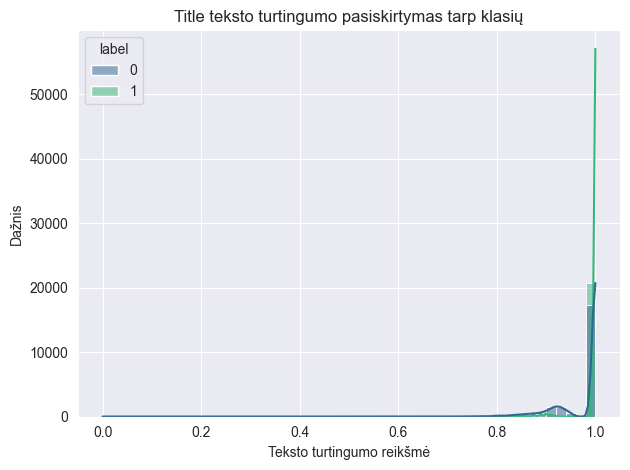

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to plot
features = ["title_lexical_richness", "title_sentiment", "title_subjectivity"]

sns.histplot(
    data=df,
    x="title_lexical_richness",
    hue="label",
    kde=True,
    palette="viridis",
    bins=50,
)

# Customize the plot
plt.title("Title teksto turtingumo pasiskirtymas tarp klasių")
plt.xlabel("Teksto turtingumo reikšmė")
plt.ylabel("Dažnis")
# plt.legend(title="Klasė")

# Show the plot
plt.tight_layout()
plt.show()

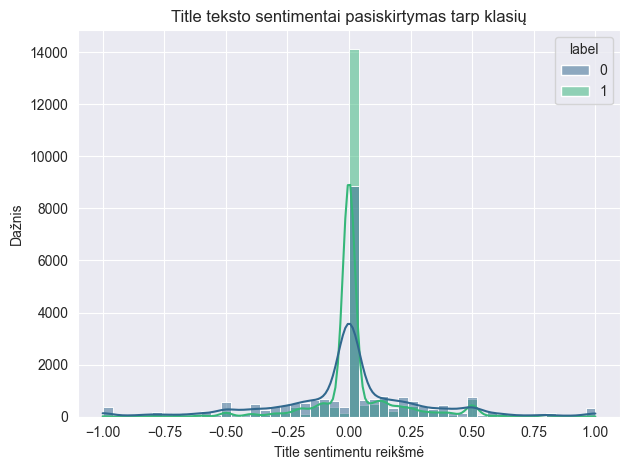

In [124]:
sns.histplot(
    data=df,
    x="title_sentiment",
    hue="label",
    kde=True,
    palette="viridis",
    bins=50,
)

# Customize the plot
plt.title("Title teksto sentimentai pasiskirtymas tarp klasių")
plt.xlabel("Title sentimentu reikšmė")
plt.ylabel("Dažnis")
# plt.legend(title="Klasė")

# Show the plot
plt.tight_layout()
plt.show()

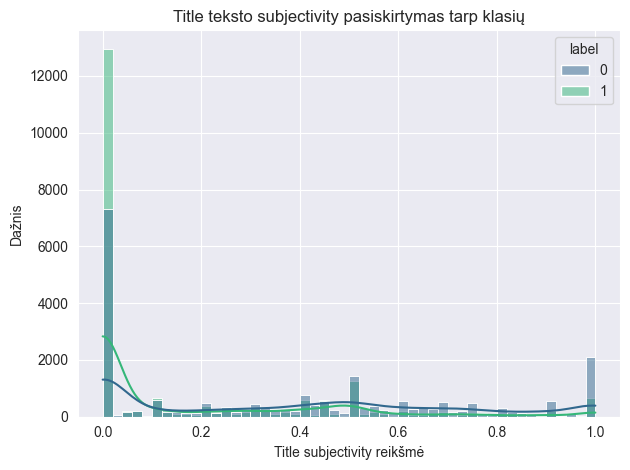

In [125]:
sns.histplot(
    data=df,
    x="title_subjectivity",
    hue="label",
    kde=True,
    palette="viridis",
    bins=50,
)

# Customize the plot
plt.title("Title teksto subjectivity pasiskirtymas tarp klasių")
plt.xlabel("Title subjectivity reikšmė")
plt.ylabel("Dažnis")
# plt.legend(title="Klasė")

# Show the plot
plt.tight_layout()
plt.show()

In [108]:
df.groupby("label")["title_lexical_richness"].describe()

# Pasiskirstymas tarp klasių yra labai panašus, nlb naudinga modelio prognozavimui.

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22851.0,0.975195,0.049743,0.0,1.0,1.0,1.0,1.0
1,21416.0,0.996114,0.021266,0.7,1.0,1.0,1.0,1.0


In [109]:
df.groupby("label")["title_sentiment"].describe()

# Irgi nera labai dideliu skirtumu

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22851.0,0.002718,0.322484,-1.0,-0.1,0.0,0.125,1.0
1,21416.0,0.024715,0.183677,-1.0,0.0,0.0,0.000,1.0


In [110]:
df.groupby("label")["title_subjectivity"].describe()

# Skirtumai didziausi, butu naudingiausia, melagingos naujienos yra labiau linkusios turėti subjektyvesnius pavadinimus.

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22851.0,0.376843,0.344686,0.0,0.0,0.375,0.633333,1.0
1,21416.0,0.174113,0.271819,0.0,0.0,0.000,0.333333,1.0


### Common Words

In [ ]:
from collections import Counter
import spacy
from nltk.corpus import stopwords
import pandas as pd
import nltk

# Download stop words if not already downloaded
# nltk.download("stopwords")

# Load SpaCy's English model
nlp = spacy.load("en_core_web_sm")

# Define the stop words set
stop_words = set(stopwords.words("english"))


# Define a function for text preprocessing
def preprocess_text_pipeline(text):
    doc = nlp(text.lower())  # Lowercase and process text
    tokens = [
        token.lemma_  # Lemmatize tokens
        for token in doc
        if token.is_alpha
        and token.text not in stop_words  # Exclude punctuation and stop words
    ]
    return tokens


# Apply the preprocessing pipeline and flatten the list of tokens
df["tokens"] = df["text"].apply(preprocess_text_pipeline)

# Flatten the token list for all rows
all_tokens = [token for tokens in df["tokens"] for token in tokens]

# Count word frequencies
word_freq = Counter(all_tokens)

# Get the top 20 most common words
common_words = word_freq.most_common(20)

# Display results
print("Top 20 Most Common Words:", common_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\auste\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x0000019ECF711110>>
Traceback (most recent call last):
  File "C:\Users\auste\4 Kursas\Naturali kalba\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


KeyboardInterrupt: 

### Most common named entities (people, organizations), pirma reiktu pataisyti klaidas, nes ima zodzius kaip "dont" ir "don" kaip Person

In [65]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")


# Extract and categorize entities
def extract_entities(text):
    doc = nlp(text)
    people = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    orgs = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
    return people, orgs


# Apply entity extraction to the DataFrame
df[["people_ent", "organizations_ent"]] = df["text"].apply(
    lambda x: pd.Series(extract_entities(x))
)

Top 10 Normalized People: [('Donald Trump', 57959), ('Hillary Clinton', 30700), ('Barack Obama', 24305), ('Ted Cruz', 4964), ('Vladimir Putin', 4186), ('James Comey', 3851), ('Bernie Sanders', 3577), ('Paul Ryan', 3523), ('Donald J. Trump', 2070), ('Flynn', 1860)]
Top 10 Normalized Organizations: [('Donald Trump', 53677), ('Reuters', 28943), ('Senate', 9422), ('Congress', 8767), ('FBI', 7396), ('the White House', 6272), ('House', 5661), ('EU', 5135), ('White House', 5076), ('CNN', 5068)]


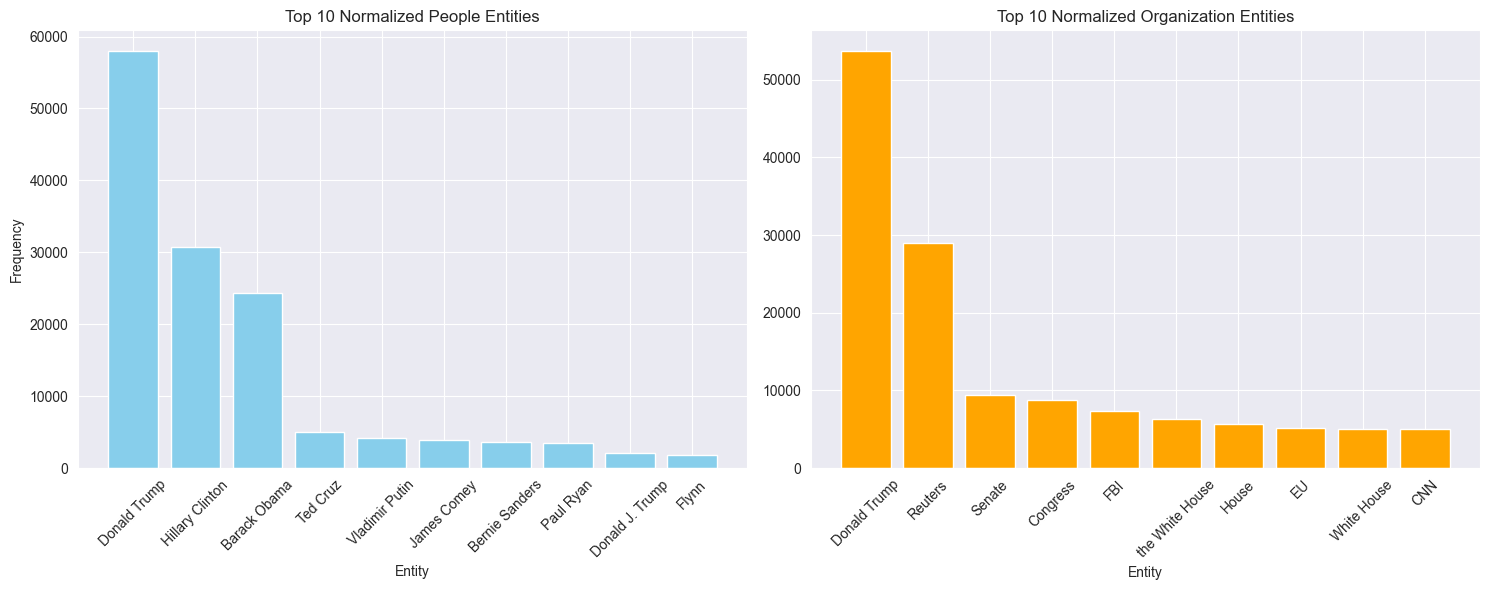

In [91]:
from collections import Counter

# Create a mapping for common entities
entity_mapping = {
    "Trump": "Donald Trump",
    "Donald Trump": "Donald Trump",
    "Clinton": "Hillary Clinton",
    "Hillary Clinton": "Hillary Clinton",
    "Obama": "Barack Obama",
    "Barack Obama": "Barack Obama",
    "Hillary": "Hillary Clinton",
    "Comey": "James Comey",
    "Putin": "Vladimir Putin",
    "Ryan": "Paul Ryan",
    "Cruz": "Ted Cruz",
    "Sanders": "Bernie Sanders",
    "Pelosi": "Nancy Pelosi",
    # Add more mappings as needed
}

# Normalize people entities in the same column
df["people_ent"] = df["people_ent"].apply(
    lambda people: [
        entity_mapping[person] if person in entity_mapping else person
        for person in people
        if person.lower() not in ["doesn", "twitter", "don"]  # Filter invalid entities
    ]
)

# Normalize organizations entities in the same column
df["organizations_ent"] = df["organizations_ent"].apply(
    lambda orgs: [
        entity_mapping[org] if org in entity_mapping else org
        for org in orgs
        if org.lower() not in ["doesn", "twitter", "don"]  # Filter invalid entities
    ]
)

# Flatten the lists for frequency analysis
all_normalized_people = [person for sublist in df["people_ent"] for person in sublist]
all_normalized_organizations = [
    org for sublist in df["organizations_ent"] for org in sublist
]

# Count frequencies
normalized_people_freq = Counter(all_normalized_people).most_common(10)
normalized_orgs_freq = Counter(all_normalized_organizations).most_common(10)

# Display results
# print("Top 10 Normalized People:", normalized_people_freq)
# print("Top 10 Normalized Organizations:", normalized_orgs_freq)

# Visualization of results
import matplotlib.pyplot as plt

# Convert normalized people and organizations into DataFrames
people_df = pd.DataFrame(normalized_people_freq, columns=["Entity", "Count"])
orgs_df = pd.DataFrame(normalized_orgs_freq, columns=["Entity", "Count"])

# Create a panel with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# Plot for normalized people
axes[0].bar(people_df["Entity"], people_df["Count"], color="skyblue")
axes[0].set_title("Top 10 Normalized People Entities")
axes[0].set_xlabel("Entity")
axes[0].set_ylabel("Frequency")
axes[0].tick_params(axis="x", rotation=45)

# Plot for normalized organizations
axes[1].bar(orgs_df["Entity"], orgs_df["Count"], color="orange")
axes[1].set_title("Top 10 Normalized Organization Entities")
axes[1].set_xlabel("Entity")
axes[1].tick_params(axis="x", rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### Nlb svarbu modelio prognozei, labiau tiesiog paziureti kas dazniausiai minima

### Paminetos salys

In [113]:
import pycountry

# Get a list of country names
country_list = [country.name for country in pycountry.countries]


# Function to check for country mentions
def country_mentions(text):
    mentions = [country for country in country_list if country in text]
    return len(mentions), mentions


# Apply the function to extract country-related features
df[["country_mention_count", "mentioned_countries"]] = df["text"].apply(
    lambda x: pd.Series(country_mentions(x))
)

In [114]:
# Distribution statistics for country mentions by label
country_distribution_stats = df.groupby("label")["country_mention_count"].describe()

# Display statistics
print(country_distribution_stats)

         count      mean       std  min  25%  50%  75%    max
label                                                        
0      22851.0  0.662378  1.563510  0.0  0.0  0.0  1.0  114.0
1      21416.0  1.550803  2.055144  0.0  0.0  1.0  2.0   50.0


In [115]:
from collections import Counter

# Flatten the mentioned countries for fake and true data
fake_countries = [
    country
    for countries in df.loc[df["label"] == 0, "mentioned_countries"]
    for country in countries
]

true_countries = [
    country
    for countries in df.loc[df["label"] == 1, "mentioned_countries"]
    for country in countries
]

# Count frequencies
fake_country_counts = Counter(fake_countries).most_common(10)
true_country_counts = Counter(true_countries).most_common(10)

# Display top mentioned countries
print("Top 10 Countries in Fake News:", fake_country_counts)
print("Top 10 Countries in True News:", true_country_counts)

Top 10 Countries in Fake News: [('United States', 4157), ('Iraq', 761), ('Mexico', 698), ('India', 522), ('China', 505), ('Israel', 500), ('Germany', 440), ('Jersey', 336), ('Afghanistan', 328), ('Libya', 308)]
Top 10 Countries in True News: [('United States', 6070), ('China', 2172), ('Iraq', 1303), ('Germany', 1164), ('Mexico', 1067), ('France', 1020), ('Japan', 916), ('Israel', 847), ('India', 775), ('Saudi Arabia', 740)]


##### Minimos salys tokios pacios, bet tikros naujienos dažniau apima bent kelias šalis, nors max didesnis melagingu. Neatrodo labai naudinga, bet korealiacijos matricoj buvo > 0.2 korealiacija, tai gal kazkiek ir turi svarbumo.


In [112]:
df.to_csv("features_fake_true_data.csv", sep=",", encoding="utf-8", index=False)